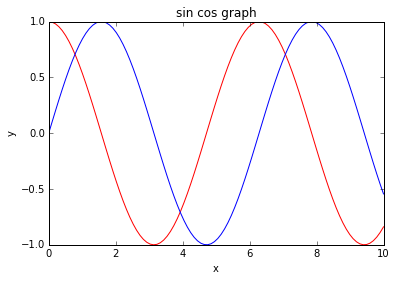

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.linspace(0,10,100)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.figure()
plt.plot(x,y_cos,)
plt.plot(x,y_sin)
plt.title("sin cos graph")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['axes.color_cycle'] = ['red','blue','green']
plt.show()


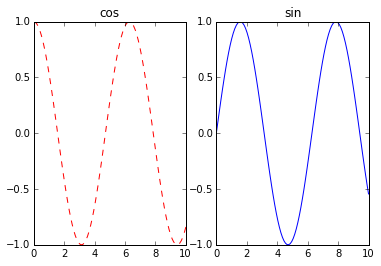

In [63]:
plt.subplot(1,2,1)
plt.plot(x,y_cos,'r--')
plt.title("cos")
plt.subplot(1,2,2)
plt.plot(x,y_sin,'b')
plt.title('sin')

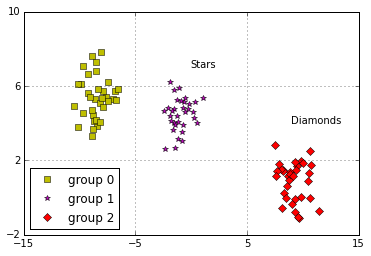

In [64]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

d = make_blobs(n_samples=100,n_features=2, centers=3,random_state=7)
groups = d[1]
coordinates = d[0]

plt.plot(coordinates[groups==0,0],coordinates[groups==0,1], 'ys', label='group 0')
plt.plot(coordinates[groups==1,0],coordinates[groups==1,1], 'm*', label='group 1')
plt.plot(coordinates[groups==2,0],coordinates[groups==2,1], 'rD', label='group 2')
plt.grid()
plt.ylim(-2,10)
plt.yticks([10,6,2,-2])
plt.xticks([15,-5,5,-15])
plt.annotate('Stars',(0,7))
plt.annotate('Diamonds',(9,4))
plt.legend(loc='lower left',numpoints=1)
plt.show()

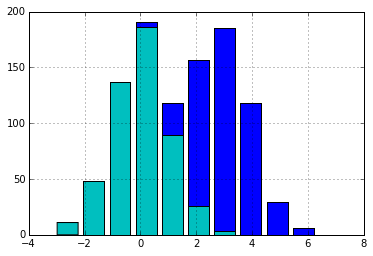

In [65]:
import numpy as np
x  = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)

plt.hist(np.column_stack((x,z)),bins=10,color=['c','b'],stacked=True)
plt.grid()

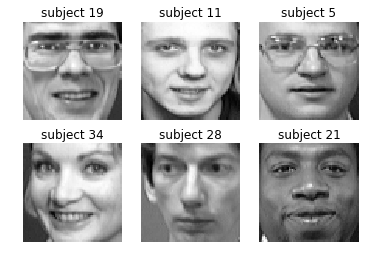

In [66]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True,random_state=5)
photo = 1
for k in range(6):
    plt.subplot(2,3,k)
    plt.imshow(dataset.data[k].reshape(64,64),cmap=plt.cm.gray,interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()

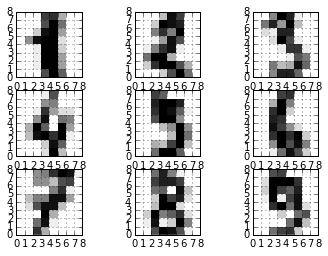

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3,3,number)
    plt.imshow(digits.images[number],cmap='binary',interpolation='none',extent=[0,8,0,8])
    plt.grid()
plt.show()

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count           150.0000          150.0000           150.0000          150.0000
mean              5.8433            3.0540             3.7587            1.1987
std               0.8281            0.4336             1.7644            0.7632
min               4.3000            2.0000             1.0000            0.1000
25%               5.1000            2.8000             1.6000            0.3000
50%               5.8000            3.0000             4.3500            1.3000
75%               6.4000            3.3000             5.1000            1.8000
max               7.9000            4.4000             6.9000            2.5000


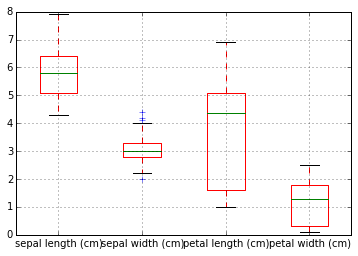

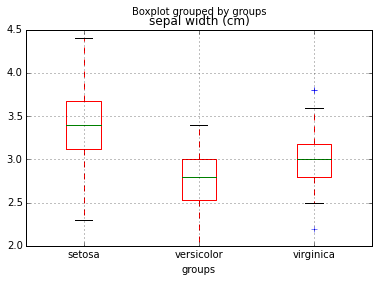

In [83]:
import pandas as pd
from sklearn.datasets import load_iris

pd.set_option('precision',5)
pd.set_option('display.width',120)

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])
print(iris_df.describe())
boxplots = iris_df.boxplot(return_type='axes')
boxplots = iris_df.boxplot(column='sepal width (cm)',by='groups',return_type='axes')


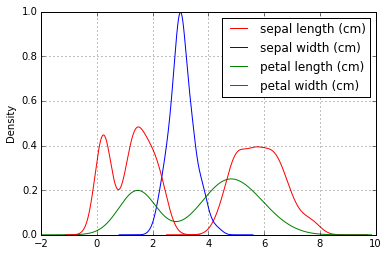

In [69]:
densityplot = iris_df.plot(kind='density')

In [70]:
# kind=hist is not current support
#single_distrubution = iris_df['sepal width (cm)'].plot(kind='hist')


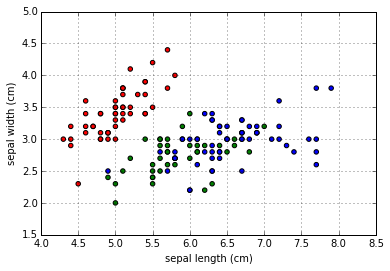

In [71]:
colors_palette = {0:"red",1: "green",2:"blue"}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter',x=0,y=1,c=colors)

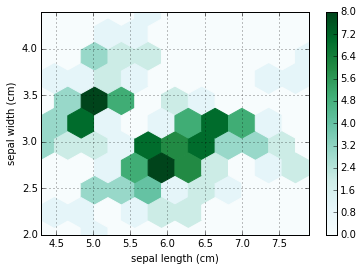

In [72]:
hexbin = iris_df.plot(kind='hexbin',x=0,y=1,gridsize=10)

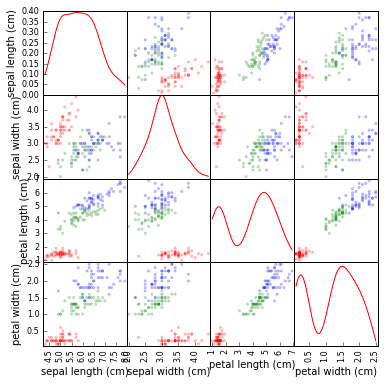

In [73]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:"red",1: "green",2:"blue"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(iris_df,alpha=0.2,figsize=(6,6),color=colors,diagonal='kde')

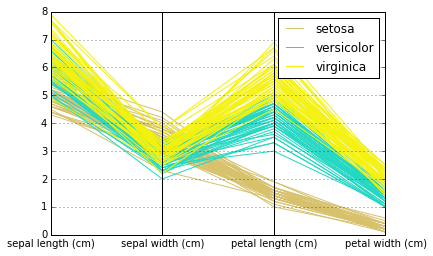

In [74]:
from pandas.tools.plotting import parallel_coordinates
pl1 = parallel_coordinates(iris_df,'groups')

In [75]:
# problem running the learning curve
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


digits = load_digits()
X,y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2',alpha=0.001,random_state=3)
#train_size, train_scores, test_scores = learning_curve(hypothesis,X,y,train_sizes=np.linspace(0.1,1.0,5), cv=10,scoring='accuracy',exploit_incremental_learning=False,n_jobs=-1)



In [76]:
from sklearn.learning_curve import validation_curve
testing_range = np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log',shuffle=True,n_iter=5,penalty='l2',alpha=0.0001,random_state=3)
#train_size, train_scores, test_scores = validation_curve(hypothesis,X,y,param_name='alpha',param_range=testing_range,cv=10,scoring='accuracy',n_jobs=-1)


In [77]:
import urllib2
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())
from sklearn.datasets import load_svmlight_file
X_train,y_train = load_svmlight_file('ijcnn1.bz2')
first_rows=2500

X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf',degree=2,random_state=101)
scores = cross_val_score(hypothesis,X_train,y_train,cv=15,scoring='accuracy',n_jobs=-1)
print ("SVC with rbf kenerl")
print scores
print (np.mean(scores))
print (np.std(scores))


ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information